
# CLASSIFICATION OF KYPHOSIS DISEASE

# PROBLEM STATEMENT

- Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output

INPUTS: 
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUTS:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.


- Link to the dataset: https://www.kaggle.com/abbasit/kyphosis-dataset

- Source: John M. Chambers and Trevor J. Hastie eds. (1992) Statistical Models in S, Wadsworth and Brooks/Cole, Pacific Grove, CA.

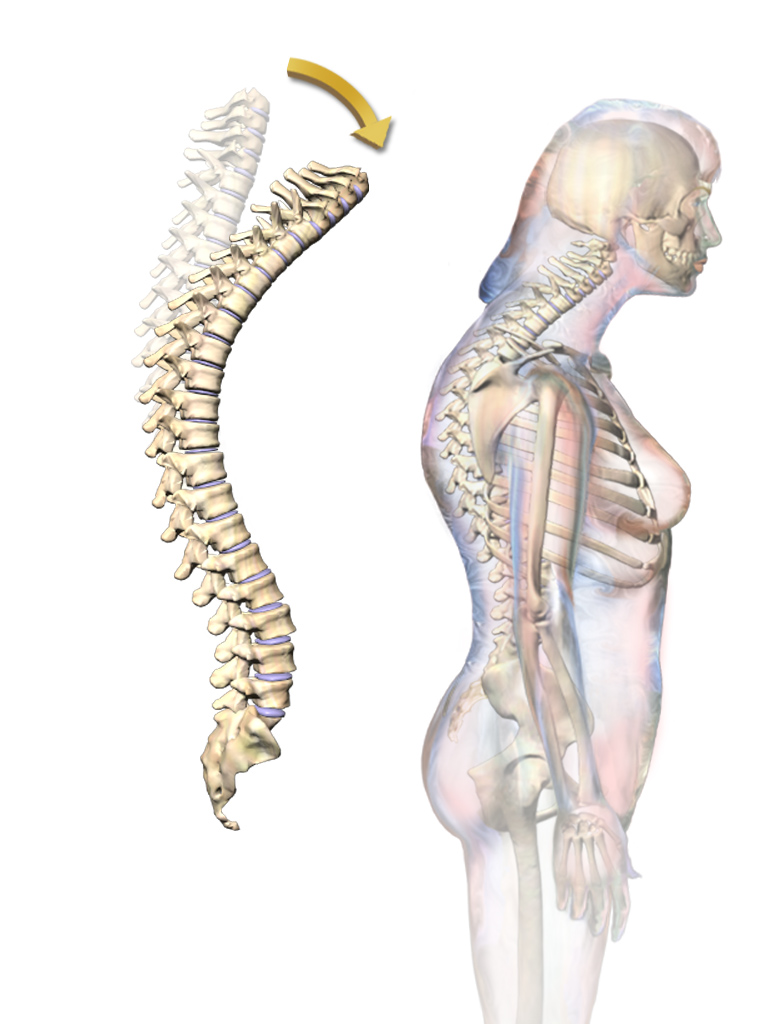

## Import Libraries 


In [1]:
import pandas as pd                # Data Manipulation and exploring
import numpy as np                 # Data Statistical Analysis 
import matplotlib.pyplot as plt    # Data Visualization 
import seaborn as sns              # Statistical Data Visualization

In [2]:
kyphosis_df = pd.read_csv('kyphosis.csv')

In [3]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [5]:
# View statistical details
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
# Print summary of the dataframe. No empty data
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


## Visualize Dataset

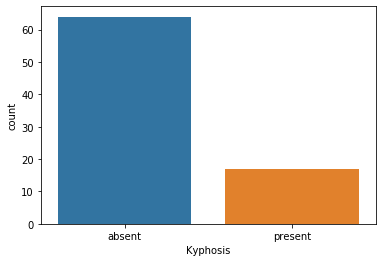

In [7]:
# Count Patients - 64 absent with no kyphosis after operation and 18 preset with the disease after surgery 
sns.countplot(kyphosis_df['Kyphosis'], label = 'Count')

In [8]:
# Perform data preprocessing. Import class
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Instantiate an object out of our class 
LabelEncoder_y = LabelEncoder()

# Replace Kyphosis column ("absent and present") into 0 and 1. Take the object and apply fit transform method to our column
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [9]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [10]:
kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6
80,0,36,4,13


In [11]:
# Absent - no kyphosis after operation
kyphosis_False = kyphosis_df[kyphosis_df['Kyphosis']== 0]

In [12]:
kyphosis_False.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16


In [13]:
print ('Disease absent after operation percentage = ', (len(kyphosis_False)/len(kyphosis_df)) * 100, '%') 

Disease absent after operation percentage =  79.01234567901234 %


In [14]:
# Disease kyphosis Present after the operation
kyphosis_True = kyphosis_df[kyphosis_df['Kyphosis']== 1]

In [15]:
kyphosis_True.head()

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12


In [16]:
print ('Disease present after operation percentage = ', (len(kyphosis_True)/len(kyphosis_df)) * 100, '%') 

Disease present after operation percentage =  20.98765432098765 %


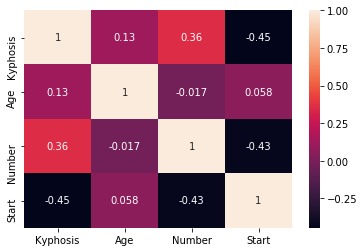

In [17]:
# Correlation 
sns.heatmap(kyphosis_df.corr(), annot = True)

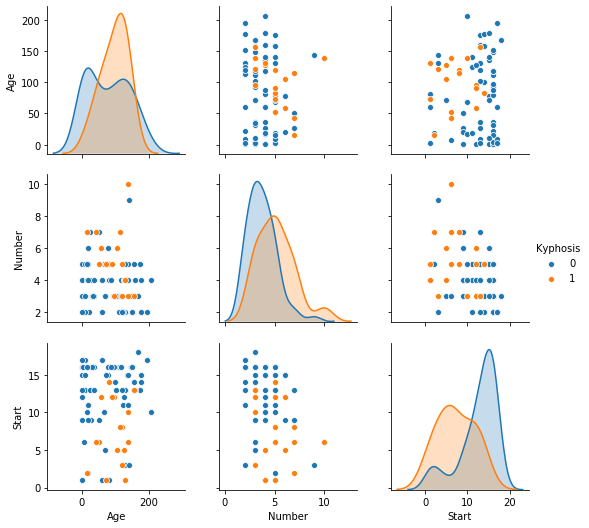

In [18]:
# Visualize 
sns.pairplot(kyphosis_df, hue = 'Kyphosis', vars = ['Age', 'Number', 'Start'])

## Testing and Training dataset

In [ ]:
# (Kyphosis) target class/output and 3 inputs (Age Number and Start)
kyphosis_df

In [19]:
# Drop the target label (Kyphosis column)
X = kyphosis_df.drop(['Kyphosis'], axis = 1)

In [20]:
# Inputs to the Machine learning algorithm
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
5,1,2,16
6,61,2,17
7,37,3,16
8,113,2,16
9,59,6,12


In [21]:
# Output target class
y = kyphosis_df['Kyphosis']

In [22]:
y

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    1
23    0
24    1
25    0
26    0
27    0
28    0
29    0
     ..
51    0
52    1
53    0
54    0
55    0
56    0
57    1
58    0
59    0
60    1
61    1
62    0
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
72    0
73    0
74    0
75    0
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [23]:
# Divide data into training and testing sets
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Training Model

In [26]:
# 56 samples/data point for training
X_train.shape

(56, 3)

In [27]:
y_train.shape

(56,)

In [28]:
# 25 samples for testing
X_test.shape

(25, 3)

In [29]:
y_test.shape

(25,)

In [30]:
# Train a decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
decision_tree = DecisionTreeClassifier()    # Instantiate an object out of our class
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Evaluating the model 

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
# Plot the Confusion Matrix for the testing dataset  
y_predict_test = decision_tree.predict(X_test)

In [33]:
y_predict_test

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0])

In [34]:
y_test

37    1
14    0
21    1
76    1
30    0
0     0
41    0
15    0
20    0
2     1
23    0
59    0
51    0
70    0
75    0
73    0
16    0
54    0
31    0
77    0
53    0
52    1
66    0
22    1
69    0
Name: Kyphosis, dtype: int32

In [38]:
cm = confusion_matrix(y_test, y_predict_test)

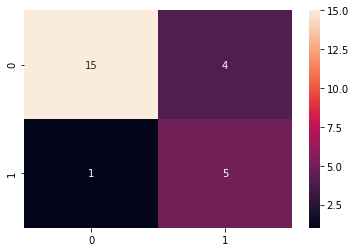

In [39]:
# Misclassified 3 and 4 samples. Correctly classified 18 samples (16 class 0 and 2 class 1)
sns.heatmap(cm, annot = True)

In [40]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.56      0.83      0.67         6

   micro avg       0.80      0.80      0.80        25
   macro avg       0.75      0.81      0.76        25
weighted avg       0.85      0.80      0.81        25



In [45]:
""" RF
precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.67      0.33      0.44         6"""

' RF\nprecision    recall  f1-score   support\n\n           0       0.82      0.95      0.88        19\n           1       0.67      0.33      0.44         6'

## Training model2

In [41]:
# Random Forest classifier to improve the model
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
#predicting on test data
y_predict_test = RandomForest.predict(X_test)

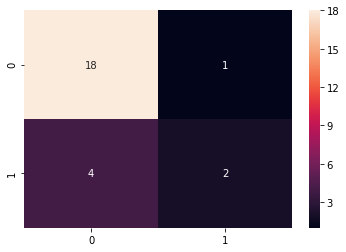

In [43]:
#creating confusion matrix for test prediction
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [44]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.67      0.33      0.44         6

   micro avg       0.80      0.80      0.80        25
   macro avg       0.74      0.64      0.66        25
weighted avg       0.78      0.80      0.77        25

